Importing modules

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset Visualization

In [172]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
data=np.array(data)
m,n=data.shape
print(m,n)
print("We have "+str(m) +" written digits with a total of "+str(n-1)+" pixels")

42000 785
We have 42000 written digits with a total of 784 pixels


Dataset Shuffling

In [174]:
data=np.array(data)
np.random.shuffle(data)

Dataset Splitting

In [175]:
k = int(m*(1/6))
data_test = data[0:k].T
data_train = data[k:].T

Input and Output

In [176]:
#output
Y_test = data_test[0]
Y_train = data_train[0]

#input
X_test = data_test[1:n]
X_train = data_train[1:n]

#input normalization
X_test = X_test / 255.
X_train = X_train / 255.

Parameters Initialization

In [177]:
def params_init():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

ReLU Function

In [178]:
def ReLU(Z):
    return np.maximum(Z,0)

def ReLU_derivative(Z):
    return Z>0

Softmax Function

In [179]:
def softmax(Z):
    Z -= np.max(Z)
    return np.exp(Z)/sum(np.exp(Z))

Propagation

In [180]:
def one_hot(Y):
    num_classes = Y.max() + 1
    num_samples = Y.size
    one_hot_Y = np.zeros((num_classes, num_samples))
    one_hot_Y[Y, np.arange(num_samples)] = 1
    return one_hot_Y

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * ReLU_derivative(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1    
    W2 -= learning_rate * dW2  
    b2 -= learning_rate * db2    
    return W1, b1, W2, b2

Accuracy

In [181]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, learning_rate, iterations):
    W1, b1, W2, b2 = params_init()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 10 == 0:
            print("Iteration:", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print("Accuracy:", accuracy)
    return W1, b1, W2, b2

Training

In [182]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.2, 5000)

Iteration: 0
Accuracy: 0.1052


Iteration: 10
Accuracy: 0.4717142857142857
Iteration: 20
Accuracy: 0.7257714285714286
Iteration: 30
Accuracy: 0.7840571428571429
Iteration: 40
Accuracy: 0.8143714285714285
Iteration: 50
Accuracy: 0.8336285714285714
Iteration: 60
Accuracy: 0.8474857142857143
Iteration: 70
Accuracy: 0.8580571428571429
Iteration: 80
Accuracy: 0.8662
Iteration: 90
Accuracy: 0.8721428571428571
Iteration: 100
Accuracy: 0.8762285714285715
Iteration: 110
Accuracy: 0.88
Iteration: 120
Accuracy: 0.8833714285714286
Iteration: 130
Accuracy: 0.8869142857142858
Iteration: 140
Accuracy: 0.8893142857142857
Iteration: 150
Accuracy: 0.8912571428571429
Iteration: 160
Accuracy: 0.8929428571428571
Iteration: 170
Accuracy: 0.8945714285714286
Iteration: 180
Accuracy: 0.8960285714285714
Iteration: 190
Accuracy: 0.8972285714285714
Iteration: 200
Accuracy: 0.8983428571428571
Iteration: 210
Accuracy: 0.8992285714285714
Iteration: 220
Accuracy: 0.9003714285714286
Iteration: 230
Accuracy: 0.9014285714285715
Iteration: 240
Accuracy

Try the model

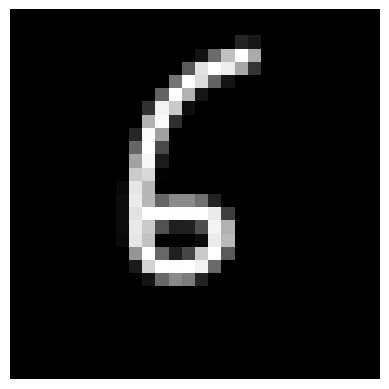

Here is the number you've drawn:  6


In [195]:
import tkinter as tk
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

drawn_image = None 
root = None 

def preprocess_and_flatten():
    resized_image = drawn_image.resize((28, 28)).convert("L")
    flattened_image = np.array(resized_image).flatten()[:, np.newaxis]
    flattened_image = (255 - flattened_image) / 255.0
    return flattened_image

def submit_and_exit():
    global X, root
    flattened_image = preprocess_and_flatten() 
    X = flattened_image
    root.destroy()

def draw_and_print_vector():
    def on_mouse_down(event):
        x1, y1 = (event.x - 8), (event.y - 8)
        x2, y2 = (event.x + 8), (event.y + 8)
        canvas.create_oval(x1, y1, x2, y2, fill="black", width=5)
        drawn_image_draw.ellipse([x1, y1, x2, y2], fill="black")

    global drawn_image, root
    root = tk.Tk()
    root.title("Draw a Number")

    canvas = tk.Canvas(root, width=300, height=300, bg="white")
    canvas.pack()

    drawn_image = Image.new("L", (300, 300), "white")
    drawn_image_draw = ImageDraw.Draw(drawn_image)

    canvas.bind("<B1-Motion>", on_mouse_down)

    submit_button = tk.Button(root, text="Submit", command=submit_and_exit)
    submit_button.pack()

    root.mainloop()


draw_and_print_vector()

X_reshaped = X.reshape(28, 28)*255
plt.imshow(X_reshaped, cmap='gray')
plt.axis('off')
plt.show()


_, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
predictions = get_predictions(A2)
prediction = predictions[0]
print("Here is the number you've drawn: " ,str(prediction))

